## **Alternative Fuel Vehicle Analysis**
   #### Project Overview
   #### 1. Data Loading and Preparation
   #### 2. Data Cleaning
   #### 3. Exploratory Data Analysis
   #### 4. Market Share Analysis
   #### 5. SQL Queries and Analysis
   #### 6. Visualizations
   #### 7. Infrastructure Recommendations
   #### 8. Key Findings

# Alternative Fuel Vehicle Analysis for U.S. Transportation Board

## Project Overview
This notebook analyzes alternative fuel vehicle adoption across the United States to support infrastructure planning and EV adoption forecasting.

### Questions Answered:
1. What percentage of vehicles in each state are EVs, PHEVs, HEVs, and gasoline?
2. Which states have the highest EV adoption rates, and which lag behind?
3. Which alternative fuels are significant vs. niche?
4. Where should policymakers prioritize EV infrastructure investment?

### Tech Stack:
- Python (pandas, matplotlib, seaborn, plotly)
- SQL (pandasql)

### Data Source:
Vehicle_Data.csv - U.S. vehicle registration data by state and fuel type (2024)

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=6dc87b6e83dab6f26b71f593bb490b6cd6a66655d3e4b4660c9a2cb3da4d201d
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [ ]:
import pandas as pd
from pandasql import sqldf

In [ ]:
dataset = pd.read_csv('./Vehicle Data.csv')
dataset

,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel
0,Alabama,"13,000","5,800","63,300","54,200","441,200",100,100,0,0,"4,102,200","127,000","29,000"
1,Alaska,"2,700",900,"10,600","9,600","46,800",0,0,0,0,"454,300","29,800","5,100"
2,Arizona,"89,800","25,600","175,700","68,600","437,100",600,700,0,0,"5,469,000","197,700","64,200"
3,Arkansas,"7,100","3,200","37,000","37,000","276,700",200,0,0,0,"2,246,100","90,700","10,300"
4,California,"1,256,600","410,700","1,703,200","201,600","1,314,600","10,100","1,500","16,900",0,"31,191,900","735,300","7,900"
5,Colorado,"90,100","37,500","152,700","68,100","334,300",300,100,0,0,"4,508,800","203,400","46,500"
6,Connecticut,"31,600","18,400","75,300","10,900","133,600",100,0,0,0,"2,612,600","42,300","20,900"
7,Delaware,"8,400","3,800","22,900","5,100","63,900",0,0,0,0,"791,300","14,200","5,100"
8,District of Columbia,"8,100","3,700","18,100",400,"16,800",100,0,0,0,"262,500","1,800",600
9,Florida,"254,900","57,300","414,500","170,500","1,101,100",400,100,0,0,"16,136,500","351,800","96,100"


In [ ]:
dataset.isna().sum()

,0
State,0
Electric (EV),0
Plug-In Hybrid Electric (PHEV),0
Hybrid Electric (HEV),0
Biodiesel,0
Ethanol/Flex (E85),0
Compressed Natural Gas (CNG),0
Propane,0
Hydrogen,0
Methanol,0


In [ ]:
# Clean the columns by removing commas and converting to numeric

dataset['Electric (EV)'] = dataset['Electric (EV)'].str.replace(',', '').astype(int)
dataset['Plug-In Hybrid Electric (PHEV)'] = dataset['Plug-In Hybrid Electric (PHEV)'].str.replace(',', '').astype(int)
dataset['Hybrid Electric (HEV)'] = dataset['Hybrid Electric (HEV)'].str.replace(',', '').astype(int)
dataset['Biodiesel'] = dataset['Biodiesel'].str.replace(',', '').astype(int)
dataset['Ethanol/Flex (E85)'] = dataset['Ethanol/Flex (E85)'].str.replace(',', '').astype(int)
dataset['Compressed Natural Gas (CNG)'] = dataset['Compressed Natural Gas (CNG)'].str.replace(',', '').astype(int)
dataset['Propane'] = dataset['Propane'].str.replace(',', '').astype(int)

dataset['Hydrogen'] = dataset['Hydrogen'].str.replace(',', '').astype(int)
# dataset['Methanol'] = dataset['Methanol'].str.replace(',', '').astype(int)
dataset['Diesel'] = dataset['Diesel'].str.replace(',', '').astype(int)
dataset['Unknown Fuel'] = dataset['Unknown Fuel'].str.replace(',', '').astype(int)

dataset['Gasoline'] = dataset['Gasoline'].str.replace(',', '').astype(int)


dataset

,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel
0,Alabama,13000,5800,63300,54200,441200,100,100,0,0,4102200,127000,29000
1,Alaska,2700,900,10600,9600,46800,0,0,0,0,454300,29800,5100
2,Arizona,89800,25600,175700,68600,437100,600,700,0,0,5469000,197700,64200
3,Arkansas,7100,3200,37000,37000,276700,200,0,0,0,2246100,90700,10300
4,California,1256600,410700,1703200,201600,1314600,10100,1500,16900,0,31191900,735300,7900
5,Colorado,90100,37500,152700,68100,334300,300,100,0,0,4508800,203400,46500
6,Connecticut,31600,18400,75300,10900,133600,100,0,0,0,2612600,42300,20900
7,Delaware,8400,3800,22900,5100,63900,0,0,0,0,791300,14200,5100
8,District of Columbia,8100,3700,18100,400,16800,100,0,0,0,262500,1800,600
9,Florida,254900,57300,414500,170500,1101100,400,100,0,0,16136500,351800,96100


In [ ]:
# Rename the columns
dataset = dataset.rename(columns={"Electric (EV)": "EV", "Plug-In Hybrid Electric (PHEV)": "PHEV", "Hybrid Electric (HEV)": "HEV", "Ethanol/Flex (E85)": "E85",
                      "Compressed Natural Gas (CNG)":"CNG", "Unknown Fuel": "Unknown_Fuel"})

In [ ]:
dataset

,State,EV,PHEV,HEV,Biodiesel,E85,CNG,Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown_Fuel
0,Alabama,13000,5800,63300,54200,441200,100,100,0,0,4102200,127000,29000
1,Alaska,2700,900,10600,9600,46800,0,0,0,0,454300,29800,5100
2,Arizona,89800,25600,175700,68600,437100,600,700,0,0,5469000,197700,64200
3,Arkansas,7100,3200,37000,37000,276700,200,0,0,0,2246100,90700,10300
4,California,1256600,410700,1703200,201600,1314600,10100,1500,16900,0,31191900,735300,7900
5,Colorado,90100,37500,152700,68100,334300,300,100,0,0,4508800,203400,46500
6,Connecticut,31600,18400,75300,10900,133600,100,0,0,0,2612600,42300,20900
7,Delaware,8400,3800,22900,5100,63900,0,0,0,0,791300,14200,5100
8,District of Columbia,8100,3700,18100,400,16800,100,0,0,0,262500,1800,600
9,Florida,254900,57300,414500,170500,1101100,400,100,0,0,16136500,351800,96100


In [ ]:
dataset['Total_Vehicles'] = dataset[['EV', 'PHEV', 'HEV', 'Biodiesel', 'E85', 'CNG',
                               'Propane', 'Hydrogen', 'Methanol', 'Gasoline',
                               'Diesel', 'Unknown_Fuel']].sum(axis=1)

In [ ]:
dataset

,State,EV,PHEV,HEV,Biodiesel,E85,CNG,Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown_Fuel,Total_Vehicles
0,Alabama,13000,5800,63300,54200,441200,100,100,0,0,4102200,127000,29000,4835900
1,Alaska,2700,900,10600,9600,46800,0,0,0,0,454300,29800,5100,559800
2,Arizona,89800,25600,175700,68600,437100,600,700,0,0,5469000,197700,64200,6529000
3,Arkansas,7100,3200,37000,37000,276700,200,0,0,0,2246100,90700,10300,2708300
4,California,1256600,410700,1703200,201600,1314600,10100,1500,16900,0,31191900,735300,7900,36850300
5,Colorado,90100,37500,152700,68100,334300,300,100,0,0,4508800,203400,46500,5441800
6,Connecticut,31600,18400,75300,10900,133600,100,0,0,0,2612600,42300,20900,2945700
7,Delaware,8400,3800,22900,5100,63900,0,0,0,0,791300,14200,5100,914700
8,District of Columbia,8100,3700,18100,400,16800,100,0,0,0,262500,1800,600,312100
9,Florida,254900,57300,414500,170500,1101100,400,100,0,0,16136500,351800,96100,18583200


## SQL Analysis Using pandasql

The following queries analyze the vehicle data using SQL syntax.
Each query addresses specific analytical questions.

In [ ]:
# -- ============================================
# -- QUERY 1: COMPLETE MARKET SHARE BY STATE
# -- ============================================

total_vehicle_query = '''SELECT
    state,
    ev,
    phev,
    hev,
    Biodiesel,
    E85,
    gasoline,
    diesel,
    propane,
    cng,
    hydrogen,
    Methanol,
    Unknown_Fuel,
    total_vehicles,
    ROUND(100.0 * ev / total_vehicles, 2) as ev_percent,
    ROUND(100.0 * phev / total_vehicles, 2) as phev_percent,
    ROUND(100.0 * hev / total_vehicles, 2) as hev_percent,
    ROUND(100.0 * gasoline / total_vehicles, 2) as gasoline_percent,
    ROUND(100.0 * (ev + phev + hev) / total_vehicles, 2) as afv_percent
FROM dataset
ORDER BY ev_percent DESC;'''

query_result = sqldf(total_vehicle_query, globals())

query_result

,State,EV,PHEV,HEV,Biodiesel,E85,Gasoline,Diesel,Propane,CNG,Hydrogen,Methanol,Unknown_Fuel,Total_Vehicles,ev_percent,phev_percent,hev_percent,gasoline_percent,afv_percent
0,California,1256600,410700,1703200,201600,1314600,31191900,735300,1500,10100,16900,0,7900,36850300,3.41,1.11,4.62,84.64,9.15
1,District of Columbia,8100,3700,18100,400,16800,262500,1800,0,100,0,0,600,312100,2.60,1.19,5.80,84.11,9.58
2,Hawaii,25600,7300,36400,3400,37300,951000,15400,0,0,0,0,3700,1080100,2.37,0.68,3.37,88.05,6.42
3,Washington,152100,41200,307200,73800,337700,5583000,274200,100,100,0,0,46700,6816100,2.23,0.60,4.51,81.91,7.34
4,Nevada,47400,10600,69600,27200,125600,2169300,85800,100,200,0,0,20300,2556100,1.85,0.41,2.72,84.87,4.99
5,New Jersey,134800,40900,174200,27800,392100,6433000,84600,0,300,0,0,36400,7324100,1.84,0.56,2.38,87.83,4.78
6,Oregon,64400,28800,156900,55500,184600,3074300,217000,100,100,0,0,51000,3832700,1.68,0.75,4.09,80.21,6.53
7,Colorado,90100,37500,152700,68100,334300,4508800,203400,100,300,0,0,46500,5441800,1.66,0.69,2.81,82.85,5.15
8,Maryland,72100,31300,168700,32100,309300,4327800,86900,0,300,0,0,31500,5060000,1.42,0.62,3.33,85.53,5.38
9,Arizona,89800,25600,175700,68600,437100,5469000,197700,700,600,0,0,64200,6529000,1.38,0.39,2.69,83.76,4.46


In [ ]:
# -- ============================================
# -- QUERY 2: TOP 5 EV ADOPTION STATES
# -- ============================================

top_5_ev = '''SELECT
    state,
    ev,
    total_vehicles as 'Total Vehicles',
    ev_percent,
    ROUND(100.0 * (ev + phev) / total_vehicles, 2) as 'ZEV %',
    ROUND(100.0 * (ev + phev + hev) / total_vehicles, 2) as 'AFV %'
FROM query_result
ORDER BY ev_percent DESC
LIMIT 5;'''


top_5_ev_result = sqldf(top_5_ev, globals())

top_5_ev_result

,State,EV,Total Vehicles,ev_percent,ZEV %,AFV %
0,California,1256600,36850300,3.41,4.52,9.15
1,District of Columbia,8100,312100,2.60,3.78,9.58
2,Hawaii,25600,1080100,2.37,3.05,6.42
3,Washington,152100,6816100,2.23,2.84,7.34
4,Nevada,47400,2556100,1.85,2.27,4.99


In [ ]:
# -- ============================================
# -- QUERY 3: BOTTOM 5 EV ADOPTION STATES
# -- ============================================

bottom_5_ev = '''SELECT
    state,
    ev,
    total_vehicles as 'Total Vehicles',
    ev_percent
FROM query_result
WHERE total_vehicles > 0
ORDER BY ev_percent ASC
LIMIT 5;'''



bottom_5_ev_result = sqldf(bottom_5_ev, globals())

bottom_5_ev_result


,State,EV,Total Vehicles,ev_percent
0,Mississippi,3600,2723300,0.13
1,North Dakota,1000,797400,0.13
2,Wyoming,1100,652900,0.17
3,South Dakota,1700,918000,0.19
4,West Virginia,2800,1510900,0.19


In [ ]:
# -- ============================================
# -- QUERY 4: LARGE STATE COMPARISON
# -- ============================================

# -- Compare the 8 largest states by total vehicles

compare_query = '''SELECT
    state,
    total_vehicles,
    ev,
    phev,
    hev,
    ev_percent,
    ROUND(100.0 * phev / total_vehicles, 2) as 'PHEV %',
    ROUND(100.0 * hev / total_vehicles, 2) as 'HEV %',
    ROUND(100.0 * (ev + phev + hev) / total_vehicles, 2) as 'Total AFV %'
FROM query_result
WHERE state IN ('California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia')
ORDER BY ev_percent DESC;'''




compare_query_result = sqldf(compare_query, globals())

compare_query_result

,State,Total_Vehicles,EV,PHEV,HEV,ev_percent,PHEV %,HEV %,Total AFV %
0,California,36850300,1256600,410700,1703200,3.41,1.11,4.62,9.15
1,Florida,18583200,254900,57300,414500,1.37,0.31,2.23,3.91
2,New York,11318600,131300,92300,314000,1.16,0.82,2.77,4.75
3,Illinois,10043200,99600,33400,285400,0.99,0.33,2.84,4.17
4,Georgia,9642400,92400,22700,175300,0.96,0.24,1.82,3.01
5,Texas,25796600,230100,55300,445100,0.89,0.21,1.73,2.83
6,Pennsylvania,10211000,70200,38900,245400,0.69,0.38,2.40,3.47
7,Ohio,10317300,50400,24000,199800,0.49,0.23,1.94,2.66


In [ ]:
# -- ============================================
# -- QUERY 5: NATIONAL STATISTICS SUMMARY
# -- ============================================

stats = '''SELECT
    SUM(total_vehicles) as 'Total Vehicles',
    SUM(ev) as 'Total EVs',
    SUM(phev) as 'Total PHEVs',
    SUM(hev) as 'Total HEVs',
    SUM(ev + phev + hev) as 'Total AFVs',
    ROUND(100.0 * SUM(ev) / SUM(total_vehicles), 2) as 'National EV %',
    ROUND(100.0 * SUM(phev) / SUM(total_vehicles), 2) as 'National PHEV %',
    ROUND(100.0 * SUM(hev) / SUM(total_vehicles), 2) as 'National HEV %',
    ROUND(100.0 * SUM(ev + phev + hev) / SUM(total_vehicles), 2) as 'National AFV %'
FROM query_result;'''

stats_result = sqldf(stats, globals())

stats_result

,Total Vehicles,Total EVs,Total PHEVs,Total HEVs,Total AFVs,National EV %,National PHEV %,National HEV %,National AFV %
0,287096500,3555900,1307200,7392300,12255400,1.24,0.46,2.57,4.27


In [ ]:
# -- ============================================
# -- QUERY 6: ALTERNATIVE FUELS ANALYSIS
# -- ============================================

alt_fuel = '''SELECT
    'Biodiesel' as fuel_type,
    SUM(biodiesel) as total_vehicles,
    ROUND(100.0 * SUM(biodiesel) / SUM(total_vehicles), 4) as national_percent,
    CASE
        WHEN ROUND(100.0 * SUM(biodiesel) / SUM(total_vehicles), 4) > 1 THEN 'SIGNIFICANT'
        WHEN ROUND(100.0 * SUM(biodiesel) / SUM(total_vehicles), 4) > 0.1 THEN 'EMERGING'
        ELSE 'NICHE'
    END as significance
FROM query_result

UNION ALL

SELECT
    'Ethanol',
    SUM(E85),
    ROUND(100.0 * SUM(E85) / SUM(total_vehicles), 4),
    CASE
        WHEN ROUND(100.0 * SUM(E85) / SUM(total_vehicles), 4) > 1 THEN 'SIGNIFICANT'
        WHEN ROUND(100.0 * SUM(E85) / SUM(total_vehicles), 4) > 0.1 THEN 'EMERGING'
        ELSE 'NICHE'
    END
FROM query_result

UNION ALL

SELECT
    'Hydrogen',
    SUM(hydrogen),
    ROUND(100.0 * SUM(hydrogen) / SUM(total_vehicles), 4),
    CASE
        WHEN ROUND(100.0 * SUM(hydrogen) / SUM(total_vehicles), 4) > 1 THEN 'SIGNIFICANT'
        WHEN ROUND(100.0 * SUM(hydrogen) / SUM(total_vehicles), 4) > 0.1 THEN 'EMERGING'
        ELSE 'NICHE'
    END
FROM query_result

UNION ALL

SELECT
    'CNG',
    SUM(cng),
    ROUND(100.0 * SUM(cng) / SUM(total_vehicles), 4),
    CASE
        WHEN ROUND(100.0 * SUM(cng) / SUM(total_vehicles), 4) > 1 THEN 'SIGNIFICANT'
        WHEN ROUND(100.0 * SUM(cng) / SUM(total_vehicles), 4) > 0.1 THEN 'EMERGING'
        ELSE 'NICHE'
    END
FROM query_result

UNION ALL

SELECT
    'Propane',
    SUM(Propane),
    ROUND(100.0 * SUM(Propane) / SUM(total_vehicles), 4),
    CASE
        WHEN ROUND(100.0 * SUM(Propane) / SUM(total_vehicles), 4) > 1 THEN 'SIGNIFICANT'
        WHEN ROUND(100.0 * SUM(Propane) / SUM(total_vehicles), 4) > 0.1 THEN 'EMERGING'
        ELSE 'NICHE'
    END
FROM query_result;'''



alt_fuel_result = sqldf(alt_fuel, globals())

alt_fuel_result

,fuel_type,total_vehicles,national_percent,significance
0,Biodiesel,2803600,0.9765,EMERGING
1,Ethanol,20240600,7.0501,SIGNIFICANT
2,Hydrogen,16900,0.0059,NICHE
3,CNG,24700,0.0086,NICHE
4,Propane,6000,0.0021,NICHE


In [ ]:
# -- ============================================
# -- QUERY 7: TOP STATES BY ALTERNATIVE FUEL
# -- ============================================

# -- Top 5 states for Ethanol/E85 (the only significant alternative fuel)

top_5_e85 = '''SELECT
    state,
    E85 as 'Ethanol Vehicles',
    total_vehicles as 'Total Vehicles',
    ROUND(100.0 * E85 / total_vehicles, 3) as 'Ethanol %'
FROM query_result
ORDER BY E85 DESC
LIMIT 5;'''

top_5_e85_result = sqldf(top_5_e85, globals())

top_5_e85_result

,State,Ethanol Vehicles,Total Vehicles,Ethanol %
0,Texas,2315400,25796600,8.976
1,California,1314600,36850300,3.567
2,Florida,1101100,18583200,5.925
3,Michigan,873700,8525400,10.248
4,Ohio,833500,10317300,8.079


In [ ]:
# -- ============================================
# -- QUERY 8: INFRASTRUCTURE PRIORITY SCORING
# -- ============================================

# -- Multi-factor scoring for infrastructure investment priority
investment_query = '''SELECT
    state,
    ev,
    total_vehicles,
    ROUND(ev_percent, 2) as 'EV %',
    -- Priority score calculation (higher = more priority)
    (
        -- Factor 1: EV Adoption Rate (0-30 points)
        CASE
            WHEN ev_percent > 2 THEN 30
            WHEN ev_percent > 1.5 THEN 25
            WHEN ev_percent > 1 THEN 20
            WHEN ev_percent > 0.5 THEN 10
            ELSE 5
        END +
        -- Factor 2: Absolute EV Count (0-30 points)
        CASE
            WHEN ev > 200000 THEN 30
            WHEN ev > 100000 THEN 25
            WHEN ev > 50000 THEN 20
            WHEN ev > 25000 THEN 15
            WHEN ev > 10000 THEN 10
            ELSE 5
        END +
        -- Factor 3: Total Fleet Size (0-20 points)
        CASE
            WHEN total_vehicles > 20000000 THEN 20
            WHEN total_vehicles > 10000000 THEN 15
            WHEN total_vehicles > 5000000 THEN 10
            WHEN total_vehicles > 2000000 THEN 5
            ELSE 2
        END
    ) as priority_score,
    -- Tier classification
    CASE
        WHEN (
            CASE WHEN ev_percent > 2 THEN 30 WHEN ev_percent > 1.5 THEN 25 WHEN ev_percent > 1 THEN 20 WHEN ev_percent > 0.5 THEN 10 ELSE 5 END +
            CASE WHEN ev > 200000 THEN 30 WHEN ev > 100000 THEN 25 WHEN ev > 50000 THEN 20 WHEN ev > 25000 THEN 15 WHEN ev > 10000 THEN 10 ELSE 5 END +
            CASE WHEN total_vehicles > 20000000 THEN 20 WHEN total_vehicles > 10000000 THEN 15 WHEN total_vehicles > 5000000 THEN 10 WHEN total_vehicles > 2000000 THEN 5 ELSE 2 END
        ) >= 60 THEN 'Tier 1 - High Priority'
        WHEN (
            CASE WHEN ev_percent > 2 THEN 30 WHEN ev_percent > 1.5 THEN 25 WHEN ev_percent > 1 THEN 20 WHEN ev_percent > 0.5 THEN 10 ELSE 5 END +
            CASE WHEN ev > 200000 THEN 30 WHEN ev > 100000 THEN 25 WHEN ev > 50000 THEN 20 WHEN ev > 25000 THEN 15 WHEN ev > 10000 THEN 10 ELSE 5 END +
            CASE WHEN total_vehicles > 20000000 THEN 20 WHEN total_vehicles > 10000000 THEN 15 WHEN total_vehicles > 5000000 THEN 10 WHEN total_vehicles > 2000000 THEN 5 ELSE 2 END
        ) >= 40 THEN 'Tier 2 - Medium Priority'
        ELSE 'Tier 3 - Lower Priority'
    END as investment_tier
FROM query_result
ORDER BY priority_score DESC;'''


investment_query_result = sqldf(investment_query, globals())

investment_query_result

,State,EV,Total_Vehicles,EV %,priority_score,investment_tier
0,California,1256600,36850300,3.41,80,Tier 1 - High Priority
1,Washington,152100,6816100,2.23,65,Tier 1 - High Priority
2,Florida,254900,18583200,1.37,65,Tier 1 - High Priority
3,New Jersey,134800,7324100,1.84,60,Tier 1 - High Priority
4,New York,131300,11318600,1.16,60,Tier 1 - High Priority
5,Texas,230100,25796600,0.89,60,Tier 1 - High Priority
6,Colorado,90100,5441800,1.66,55,Tier 2 - Medium Priority
7,Oregon,64400,3832700,1.68,50,Tier 2 - Medium Priority
8,Maryland,72100,5060000,1.42,50,Tier 2 - Medium Priority
9,Arizona,89800,6529000,1.38,50,Tier 2 - Medium Priority


In [ ]:
# -- ============================================
# -- QUERY 9: STATE RANKINGS WITH PERCENTILES
# -- ============================================

# -- Rank all states and classify into quartiles

state_rank = '''WITH state_rankings AS (
    SELECT
        state,
        ev,
        total_vehicles,
        ROUND(ev_percent, 2) as ev_percent,
        ROW_NUMBER() OVER (ORDER BY ev_percent DESC) as adoption_rank,
        NTILE(4) OVER (ORDER BY ev_percent) as quartile
    FROM query_result
)
SELECT
    state,
    ev,
    ev_percent || '%' as 'EV %',
    adoption_rank as 'National Rank',
    CASE quartile
        WHEN 4 THEN 'Top 25% (Leaders)'
        WHEN 3 THEN 'Above Average'
        WHEN 2 THEN 'Below Average'
        WHEN 1 THEN 'Bottom 25% (Laggards)'
    END as adoption_tier
FROM state_rankings
ORDER BY adoption_rank;'''



state_rank_result = sqldf(state_rank, globals())

state_rank_result

,state,ev,EV %,National Rank,adoption_tier
0,California,1256600,3.41%,1,Top 25% (Leaders)
1,District of Columbia,8100,2.6%,2,Top 25% (Leaders)
2,Hawaii,25600,2.37%,3,Top 25% (Leaders)
3,Washington,152100,2.23%,4,Top 25% (Leaders)
4,Nevada,47400,1.85%,5,Top 25% (Leaders)
5,New Jersey,134800,1.84%,6,Top 25% (Leaders)
6,Oregon,64400,1.68%,7,Top 25% (Leaders)
7,Colorado,90100,1.66%,8,Top 25% (Leaders)
8,Maryland,72100,1.42%,9,Top 25% (Leaders)
9,Arizona,89800,1.38%,10,Top 25% (Leaders)


In [ ]:
# -- ============================================
# -- QUERY 10: SUMMARY STATISTICS
# -- ============================================

# -- Distribution statistics for EV adoption across all states
summary = '''SELECT
    COUNT(*) as total_states,
    ROUND(AVG(ev_percent), 2) as mean_ev_percent,
    ROUND(
        (SELECT ev_percent FROM query_result ORDER BY ev_percent LIMIT 1 OFFSET (SELECT COUNT(*)/2 FROM query_result)),
    2) as median_ev_percent,
    ROUND(MAX(ev_percent), 2) as max_ev_percent,
    ROUND(MIN(ev_percent), 2) as min_ev_percent,
    ROUND(MAX(ev_percent) - MIN(ev_percent), 2) as range_ev_percent,
    COUNT(CASE WHEN ev_percent > 2 THEN 1 END) as states_above_2pct,
    COUNT(CASE WHEN ev_percent > 1 THEN 1 END) as states_above_1pct,
    COUNT(CASE WHEN ev_percent > (SELECT AVG(ev_percent) FROM query_result) THEN 1 END) as states_above_avg
FROM query_result;'''


summary_result = sqldf(summary, globals())

summary_result

,total_states,mean_ev_percent,median_ev_percent,max_ev_percent,min_ev_percent,range_ev_percent,states_above_2pct,states_above_1pct,states_above_avg
0,51,0.9,0.69,3.41,0.13,3.28,4,17,20


## Visualizations

Visual analysis of EV adoption patterns across states.

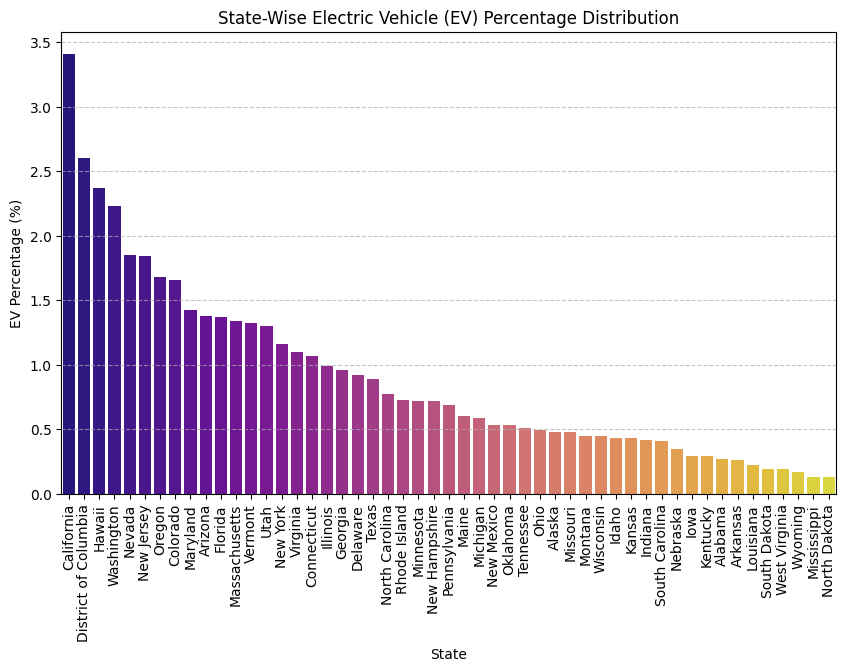

In [ ]:
# -- ============================================
# -- Visualizations showing EV distribution by state.
# -- ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for EV percentages for the top states
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='ev_percent', data=query_result, palette='plasma', hue='State', legend=False)
plt.title('State-Wise Electric Vehicle (EV) Percentage Distribution')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('EV Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Bar chart for top states by EV Count

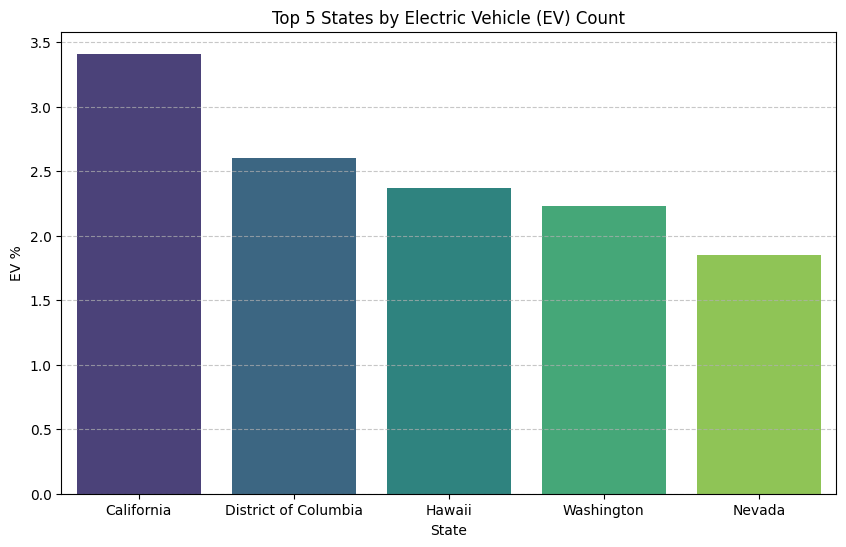

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for EV counts for the top states
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='ev_percent', data=top_5_ev_result, palette='viridis', hue='State', legend=False)
plt.title('Top 5 States by Electric Vehicle (EV) Count')
plt.xlabel('State')
plt.ylabel('EV %')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Choropleth map for EV percentages across US States

In [ ]:
import plotly.express as px

# Map visualization for EV percentages across all states

# Dictionary to map full state names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Added a new column 'State_Code' with the abbreviations
query_result['State_Code'] = query_result['State'].map(state_abbreviations)

fig = px.choropleth(query_result,
                    locations='State_Code',
                    locationmode='USA-states',
                    color='ev_percent',
                    color_continuous_scale='Viridis',
                    scope='usa',
                    title='EV Adoption Percentage Across US States',
                    range_color=[query_result['ev_percent'].min(), query_result['ev_percent'].max()])
fig.show()

## Pie chart for EV, PHEV, and HEV distribution in California

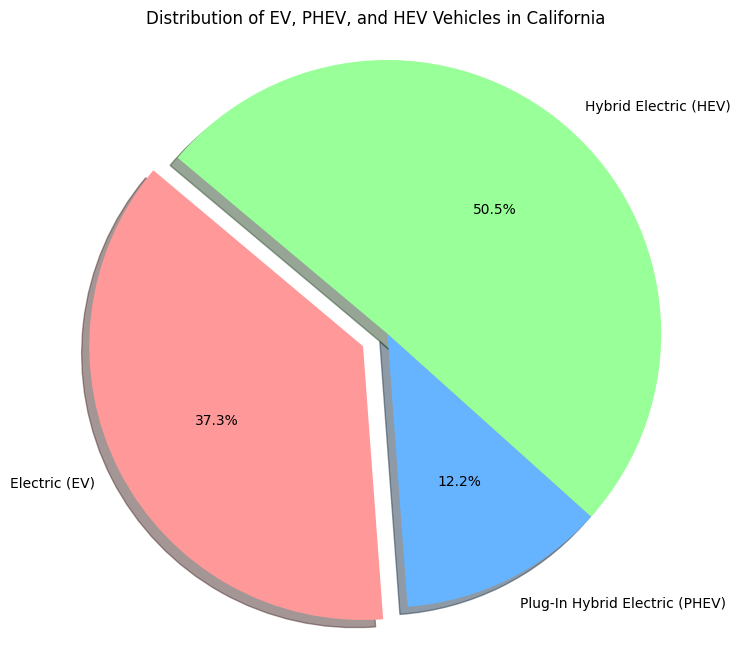

In [ ]:
import matplotlib.pyplot as plt

# Filter data for California (using the 'query_result' DataFrame)
california_data = query_result[query_result['State'] == 'California']

# Extract relevant vehicle type counts
ev_count = california_data['EV'].iloc[0]
phev_count = california_data['PHEV'].iloc[0]
hev_count = california_data['HEV'].iloc[0]

labels = ['Electric (EV)', 'Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']
sizes = [ev_count, phev_count, hev_count]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # Explode the 1st slice (EV)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of EV, PHEV, and HEV Vehicles in California')
plt.show()

## Infrastructure Investment Recommendations

Data-driven recommendations for EV charging infrastructure prioritization.

In [ ]:
print("="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)
print("\n1. MARKET SHARE:")
print(f"   - National EV adoption: {(dataset['EV'].sum() / dataset['Total_Vehicles'].sum() * 100):.2f}%")
print(f"   - National AFV adoption: {((dataset['EV'].sum() + dataset['PHEV'].sum() + dataset['HEV'].sum()) / dataset['Total_Vehicles'].sum() * 100):.2f}%")

print("\n2. STATE RANKINGS:")
print(f"   - Top EV state: {top_5_ev_result.iloc[0]['State']} ({top_5_ev_result.iloc[0]['ev_percent']:.2f}%)")
print(f"   - Lowest EV state: {bottom_5_ev_result.iloc[0]['State']} ({bottom_5_ev_result.iloc[0]['ev_percent']:.2f}%)")

print("\n3. ALTERNATIVE FUELS:")
print(f"   - Ethanol: SIGNIFICANT (7.05% of fleet)")
print(f"   - Biodiesel: EMERGING (0.98% of fleet)")
print(f"   - Hydrogen: NICHE (0.006% of fleet)")

print("\n4. INFRASTRUCTURE PRIORITIES:")
print("   Tier 1 (High Priority): California, Washington, DC, Hawaii")

KEY FINDINGS SUMMARY

1. MARKET SHARE:
   - National EV adoption: 1.24%
   - National AFV adoption: 4.27%

2. STATE RANKINGS:
   - Top EV state: California (3.41%)
   - Lowest EV state: Mississippi (0.13%)

3. ALTERNATIVE FUELS:
   - Ethanol: SIGNIFICANT (7.05% of fleet)
   - Biodiesel: EMERGING (0.98% of fleet)
   - Hydrogen: NICHE (0.006% of fleet)

4. INFRASTRUCTURE PRIORITIES:
   Tier 1 (High Priority): California, Washington, DC, Hawaii
